# Week 10 Lecture 1
## Filtering, Transforming, and Plotting
- We will look at a number of techniques for filtering and transforming data

In [2]:
import pandas as pd

orders = pd.DataFrame(
    {
        "code": [8876, 5543, 7846, 2395],
        "quantity": [1, 22, 4, 6],
        "price": [0.5, 0.25, 1.99, 0.3],
    }
)

### Filtering
- Pyret way:
```arr
fun is-high-quantity(r :: Row) -> Boolean:
  r["quantity"] >= 10
end

large-orders = filter-with(orders, is-high-quantity)
```
- pandas uses boolean based filtering to select values from a Series

In [3]:
orders["quantity"] >= 10

0    False
1     True
2    False
3    False
Name: quantity, dtype: bool

- A Series of booleans can be used to select from the original DataFrame

In [4]:
orders[orders["quantity"] >= 10]

,code,quantity,price
1,5543,22,0.25


- We can use the `.isn()` method to check membership of a list rather than write complex selection statements

In [5]:
orders["code"].isin(["8876", "7846"])

0    False
1    False
2    False
3    False
Name: code, dtype: bool

- We can check for matching values within a range using the `between()` method

In [6]:
orders["quantity"].between(3, 6)

0    False
1    False
2     True
3     True
Name: quantity, dtype: bool

## Transforming Values
Transforming existing columns (like Pyret's transform-column)

Pyret way:
```arr
fun increase-price(price :: Number) -> Number:
  price * 1.5
end

increased-price = transform-column(orders, "price", increase-price)
```

- We can increase all values inside a numerical Series by performing the calculation
- The new Series can be assigned to the column

In [8]:
orders["price"] = orders["price"] * 1.5

- We can also create new columns by performing a calculation

In [9]:
orders["total"] = orders["price"] * orders["quantity"]

## Transforming Values: Map
- A `map` can be used to apply a function element-by-element on all values in a Series
- We can use a dictionary for mapping values, for example mapping codes to product names

In [10]:
products = {
    2395: "Grapes",
    5543: "Orange",
    7846: "Watermelon",
    8876: "Apple",
}

orders["product"] = orders["code"].map(products)

- We can also use a lambda/function for complex operations
- We should always prefer a [universal function](https://numpy.org/doc/stable/reference/ufuncs.html) over a for loop when working with NumPy/pandas
    - Universal functions are optimised for array based operations

In [11]:
def uppercase(s):
    return s.upper()


orders["product"].map(uppercase)

# same as
# orders["product"].map(lambda s: s.upper())
# orders["product"].map(str.upper)

0         APPLE
1        ORANGE
2    WATERMELON
3        GRAPES
Name: product, dtype: object

## Apply
- We can [apply a function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) across each row or column of a DataFrame
- It is similar to writing a for loop across an axis of a DataFrame
- Does not accept a dictionary, and is slower than a Map
- This is similar to adding new columns using Pyret's `build-column`

```arr
fun size-of-order(r :: Row) -> Number:
  if r["total"] > 5:
    "large"
  else:
    "small"
  end
end

order-size = build-column(orders, "size", size-of-order)
```
- In pandas, a lambda is applied row-wise by setting the argument `axis=1`
  - By default, apply works column-wise
- Note the use of an inline if statement with the lambda

In [12]:
orders["size"] = orders.apply(lambda f: "large" if f["total"] > 5 else "small", axis=1)

## Sorting
The `sort_values()` method can be used to [sort a DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) by a particular column


Pyret way:
```arr
order-by(orders, "quantity", true)   # ascending
order-by(orders, "quantity", false)  # descending
```

Pandas:

In [13]:
orders.sort_values('quantity')                    # ascending

,code,quantity,price,total,product,size
0,8876,1,1.1250,1.125,Apple,small
2,7846,4,4.4775,17.910,Watermelon,large
3,2395,6,0.6750,4.050,Grapes,small
1,5543,22,0.5625,12.375,Orange,large


In [14]:
orders.sort_values('quantity', ascending=False)   # descending

,code,quantity,price,total,product,size
1,5543,22,0.5625,12.375,Orange,large
3,2395,6,0.6750,4.050,Grapes,small
2,7846,4,4.4775,17.910,Watermelon,large
0,8876,1,1.1250,1.125,Apple,small


- We can also sort using multiple columns using a list

In [25]:
orders.sort_values(["price", "quantity"])

,code,quantity,price,total,product,size
1,5543,22,0.5625,12.375,Orange,large
3,2395,6,0.6750,4.050,Grapes,small
0,8876,1,1.1250,1.125,Apple,small
2,7846,4,4.4775,17.910,Watermelon,large


## Visualisation
- We can create simple visualisations using the [plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method on a DataFrame
- This give us a simpler interface for using the [matplotlib](https://matplotlib.org/) library

In [26]:
import matplotlib.pyplot as plt

- We can create a simple bar chart by using `kind=bar`

<Axes: title={'center': 'orders'}, xlabel='product'>

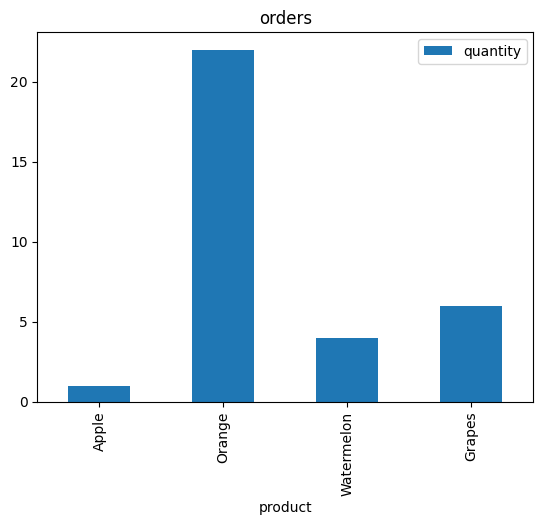

In [27]:
orders.plot(kind="bar", x="product", y="quantity", title="orders")

### Line Plot
- We can also use methods from the matplotlib library to customise plotsm

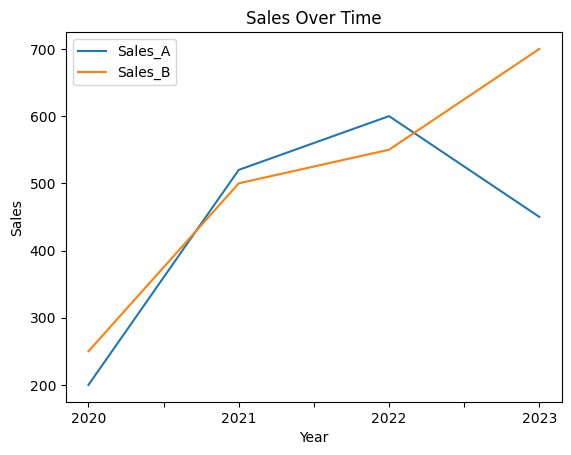

In [28]:
df = pd.DataFrame(
    {
        "Year": ["2020", "2021", "2022", "2023"],
        "Sales_A": [200, 520, 600, 450],
        "Sales_B": [250, 500, 550, 700],
    }
)

# set the index to 'Year'
df = df.set_index("Year")

# Line chart
df.plot(kind="line")
plt.title("Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

### Bar Chart

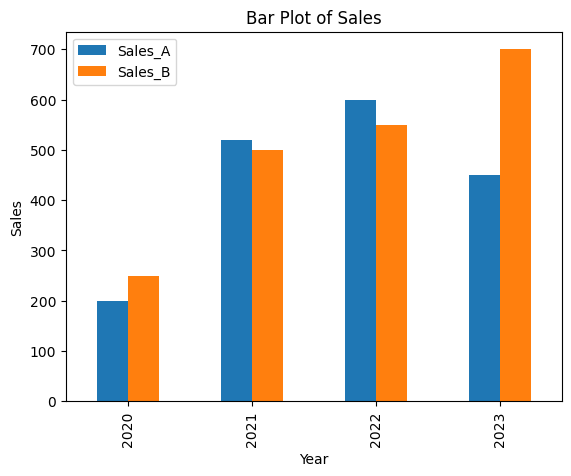

In [29]:
df.plot(kind="bar")
plt.title("Bar Plot of Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

### Scatter Plot
Scatter plots are useful for visualising the relationship between two variables

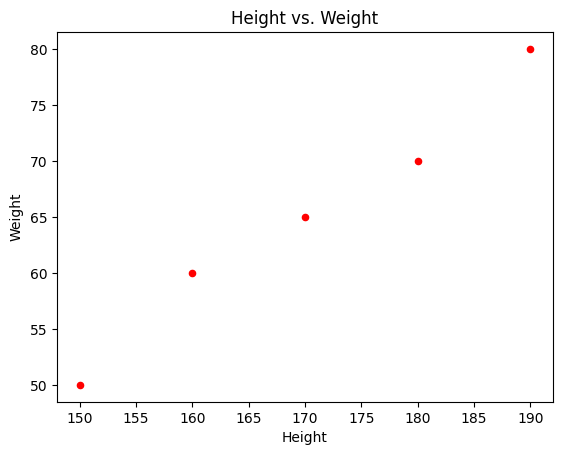

In [30]:
df2 = pd.DataFrame(
    {"Height": [150, 160, 170, 180, 190], "Weight": [50, 60, 65, 70, 80]}
)

df2.plot(kind="scatter", x="Height", y="Weight", color="red")
plt.title("Height vs. Weight")
plt.show()

### Histogram
Histograms allow you to visualise the distribution of a single variable.

<Axes: ylabel='Frequency'>

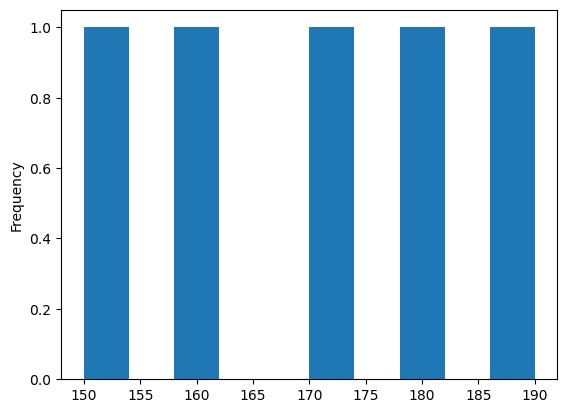

In [31]:
df2["Height"].plot(kind="hist")

We need more data for this chart to become useful. We can use numpy to create some random numbers for us.

In [32]:
import numpy as np

<Axes: ylabel='Frequency'>

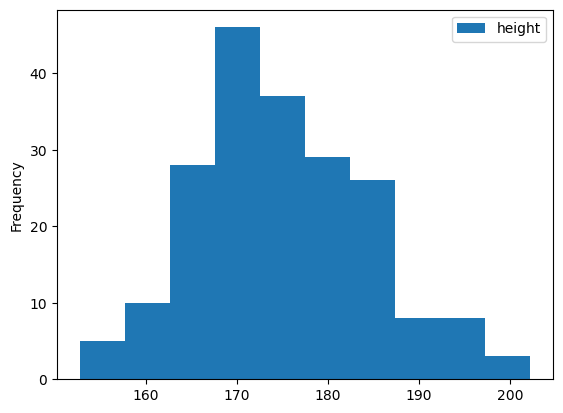

In [35]:
# Create 200 random numbers around the mean 175
df3 = pd.DataFrame({"height": np.random.normal(175, 10, 200)})

df3.plot(kind="hist")

### Box Plot
Box plots give insight into the distribution, outliers, and quartiles of the data

<Axes: >

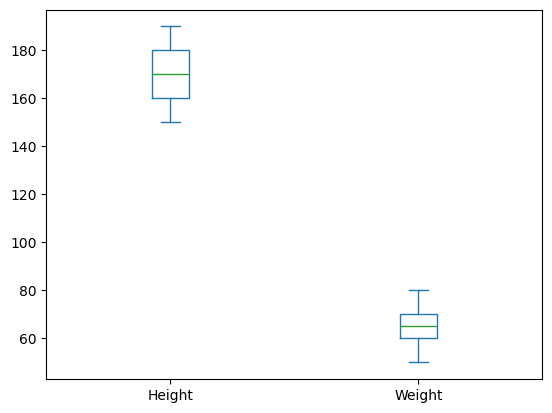

In [36]:
df2.plot(kind="box")

## Class Exercises
- Load the `workouts.csv` into a DataFrame called `workouts`
- Load `photos.csv` into a file called `photos`
### Filtering
- Filter your `workout` DataFrame to show only workouts longer than `45` minutes.
  - Use the `sum` function to calculate the number of rows containing those workouts
- From the photos dataset, filter to show only photos with subject `"Forest"`.

In [40]:
import pandas as pd

workouts = pd.read_csv('workouts.csv')
photos = pd.read_csv('photos.csv')

long_workouts = workouts[workouts["duration_minutes"] > 45]

count_long = (workouts["duration_minutes"] > 45).sum()

print("Workouts > 45 mins:")
print(long_workouts)

print("Count: ", count_long)

forest_photos = photos[photos["Subject"] == "Forest"]

print("\nPhotos with subject 'Forest':")
print(forest_photos)

Workouts > 45 mins:
   workout_date      exercise_type  duration_minutes  calories_burned  \
0    2025-12-21             boxing                62              504   
3    2025-06-24             cardio                88              214   
4    2025-09-04               hiit                99              135   
8    2025-04-28             boxing                73              282   
9    2025-06-05               yoga                47              270   
10   2025-07-29  strength training                91              835   
11   2025-04-22             cardio                95              255   
13   2025-12-22             cardio                99              129   
15   2025-06-06               yoga                94              761   
16   2025-10-02  strength training                74              281   
17   2025-04-22             cardio               116              869   
20   2025-05-07  strength training                62              589   
23   2025-08-22               y

### Sorting
- Sort your `workout` DataFrame by duration from longest to shortest.
- Sort the `photos` dataset by `date` (ascending), then print the first 5 rows.

In [42]:
workouts.sort_values('duration_minutes', ascending=False)

,workout_date,exercise_type,duration_minutes,calories_burned,heart_rate
79,2025-01-10,yoga,119,384,162
58,2025-02-22,cardio,119,360,99
62,2025-11-20,boxing,118,481,96
63,2025-12-17,strength training,118,100,185
93,2025-11-26,hiit,118,737,77
...,...,...,...,...,...
53,2025-03-05,boxing,13,229,128
40,2025-02-17,boxing,13,707,183
99,2025-01-09,boxing,12,420,73
59,2025-08-28,strength training,11,844,141


### Adding new columns
- Add a column called `workout_category` that is `"long"` if duration ≥ `60`, `"medium"` if `30-59`, `"short"` otherwise.
- In the photos dataset, add a column called `is_landscape` that contains the value `True` if the location contains `"Park"` or `"Garden"`.

In [44]:
def categorize(duration):
    if duration >= 60:
        return "long"
    elif duration >= 30:
        return "medium"
    else:
        return "short"

workouts["workout_category"] = workouts["duration_minutes"].apply(categorize)

### Transforming columns
- Convert all workout durations from minutes to hours (divide by 60).
- In the photos dataset, transform the `subject` column to be all uppercase.

In [47]:
def m_to_h(d):
    return d / 60

workouts["duration_minutes"].map(m_to_h)

0     1.033333
1     0.383333
2     0.616667
3     1.466667
4     1.650000
        ...   
95    1.250000
96    0.333333
97    0.500000
98    1.050000
99    0.200000
Name: duration_minutes, Length: 100, dtype: float64

In [49]:
photos["Subject"].map(str.upper)

0           PORTRAIT
1           MOUNTAIN
2               FOOD
3            CONCERT
4               FOOD
           ...      
95    BIRTHDAY PARTY
96      CITY SKYLINE
97          WILDLIFE
98            SUNSET
99        STREET ART
Name: Subject, Length: 100, dtype: object

### Combining operations
- Filter `workouts` to only `"long"` category, then sort by calories burned.
- What is the average duration of workouts in each category?

In [56]:
long_workouts = workouts[workouts["workout_category"] == "long"]

long_workouts_sorted = long_workouts.sort_values("calories_burned")

workouts.groupby("workout_category")["duration_minutes"].mean()

workout_category
long      93.469388
medium    41.379310
short     21.181818
Name: duration_minutes, dtype: float64

### Plotting
- Create a bar chart that shows the number of pictures taken per `Subject` in the `photos` dataset
- Create a scatter plot that shows the relationship between `calories_burned` and `heart_rate`
  - Note that this dataset contains mock data!

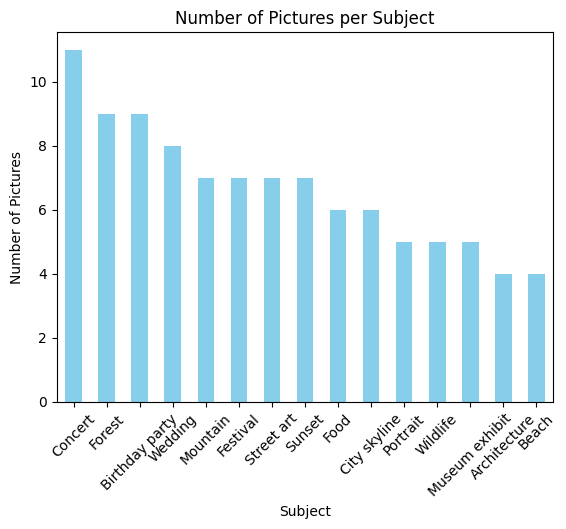

In [59]:
import matplotlib.pyplot as plt

# Count the number of photos per subject
subject_counts = photos["Subject"].value_counts()

# Create the bar chart

subject_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Pictures per Subject")
plt.xlabel("Subject")
plt.ylabel("Number of Pictures")
plt.xticks(rotation=45)
plt.show()

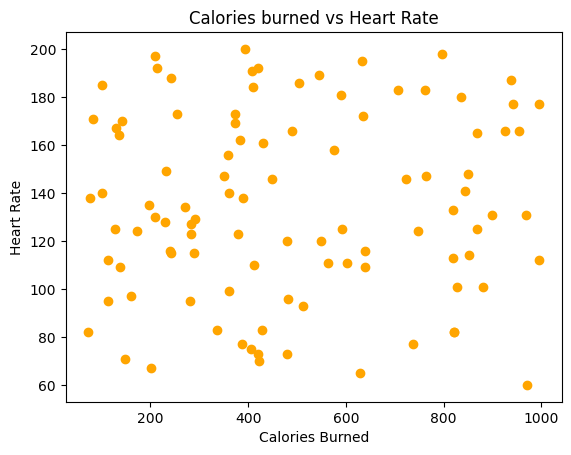

In [62]:
plt.scatter(workouts["calories_burned"], workouts["heart_rate"], color="orange")
plt.title("Calories burned vs Heart Rate")
plt.xlabel("Calories Burned")
plt.ylabel("Heart Rate")
plt.show()